# Google Colab 데이터 로드

In [1]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [1]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
과일채소목록 = pd.read_csv(io.BytesIO(myfile['과일채소목록.csv']),
                       encoding='cp949')
과일채소목록

Saving 과일채소목록.csv to 과일채소목록.csv


,종류,무게_g,길이_cm,색상,당도
0,수박,2000,30.0,1,8.0
1,수박,2500,25.0,1,7.0
2,수박,1800,20.0,1,6.5
3,수박,1500,16.0,1,8.5
4,수박,2200,21.0,1,9.5
5,자두,100,3.5,3,6.0
6,자두,120,3.7,3,7.0
7,자두,90,2.8,3,8.0
8,자두,150,3.8,3,8.5
9,자두,110,3.6,3,7.5


# 로컬 데이터 로드

In [3]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../머신러닝실습용자료/과일채소목록.csv',encoding='cp949')
src_data

FileNotFoundError: [Errno 2] No such file or directory: '../머신러닝실습용자료/과일채소목록.csv'

# 공통 실습 코드

In [4]:
#Step 3. 훈련용 세트와 테스트용 세트로 나눕니다.
# '무게_g','길이_cm','색상','당도'에 따른 과일종류 분류
data = 과일채소목록[["무게_g","길이_cm","색상","당도"]]
target = 과일채소목록["종류"]

# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

In [5]:
# 각각의 데이터 확인
print(X_train.shape , X_test.shape)
print(y_train)
print(y_test)

(40, 4) (10, 4)
16     옥수수
35      참외
25      수박
21    거봉포도
44     옥수수
41     옥수수
23    거봉포도
36      참외
5       자두
13      참외
39      참외
17     옥수수
43     옥수수
24    거봉포도
3       수박
22    거봉포도
40     옥수수
26      수박
34      자두
20    거봉포도
28      수박
14      참외
15     옥수수
30      자두
8       자두
46    거봉포도
32      자두
9       자두
48    거봉포도
42     옥수수
10      참외
31      자두
19     옥수수
47    거봉포도
12      참외
1       수박
37      참외
7       자두
27      수박
6       자두
Name: 종류, dtype: object
33      자두
29      수박
49    거봉포도
38      참외
45    거봉포도
0       수박
18     옥수수
4       수박
11      참외
2       수박
Name: 종류, dtype: object


In [15]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성

rf = RandomForestClassifier()

# 학습

rf.fit(X_train, y_train)

# 예측

print(rf.predict([[2800,32.0,1,8.0]]))

# score

print(rf.score(X_test, y_test))

['수박']
1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 결과표 작성 및 시각화

In [16]:
# 테스트 데이터 확인
display(X_test)
display(y_test)

,무게_g,길이_cm,색상,당도
33,151,3.9,3,8.6
29,2201,21.1,1,9.6
49,291,29.1,3,9.1
38,401,6.6,2,6.6
45,281,28.1,3,8.1
0,2000,30.0,1,8.0
18,400,23.0,1,1.0
4,2200,21.0,1,9.5
11,400,7.5,2,7.2
2,1800,20.0,1,6.5


,종류
33,자두
29,수박
49,거봉포도
38,참외
45,거봉포도
0,수박
18,옥수수
4,수박
11,참외
2,수박


In [21]:
# 예측결과 데이터프레임을 만들고
예측결과 = pd.DataFrame(rf.predict(X_test), columns=['예측결과'])

# concat을 통해 기존 테스트 data와 예측결과 데이터를 합친다.
result = pd.concat([X_test.reset_index(drop=True), 예측결과], axis=1)

In [22]:
# k-fold 교차 검증
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))


1.0 1.0


중요속성지표값: [0.33734317 0.24912517 0.20953848 0.20399319]


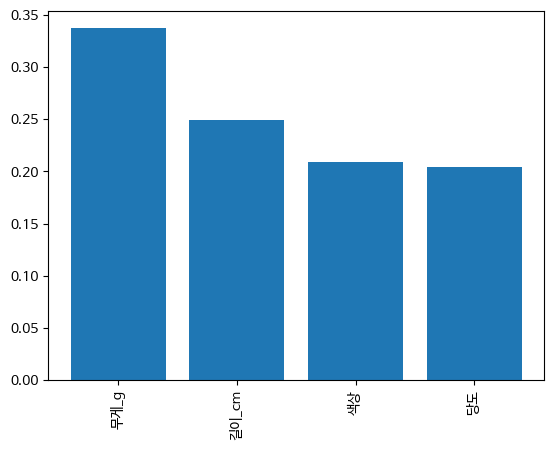

In [23]:
# 중요 속성 지표값 출력

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

imp = rf.feature_importances_
print('중요속성지표값:',imp)

plt.figure()
plt.bar(range(len(imp)),imp)
plt.xticks(range(len(imp)),data.columns, rotation=90)
plt.show()